In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

In [4]:
X

array([[-9.32386218e-02,  2.99041641e-01],
       [ 4.15898414e-01,  1.11023783e+00],
       [ 9.87505098e-02,  5.43766155e-02],
       [-3.18616104e-01, -4.98557102e-01],
       [-6.01736430e-01,  1.13675809e+00],
       [-9.36913945e-03, -1.40794778e-01],
       [ 5.63275761e-02,  3.92660379e-01],
       [-8.24184824e-01,  3.96353598e-01],
       [-3.71931480e-01,  6.86631947e-01],
       [-1.59861466e-01, -5.38689457e-01],
       [ 1.01313173e+00,  7.37618759e-02],
       [ 5.93211139e-01, -1.43861447e+00],
       [ 4.73069369e-01, -4.13685114e-01],
       [-9.47820332e-01,  5.68898692e-01],
       [ 5.83452928e-01, -3.99362660e-03],
       [ 9.05925986e-02, -9.64564692e-02],
       [ 6.76839485e-02, -1.89591342e-01],
       [ 7.46729013e-01,  8.57657068e-01],
       [ 5.78621809e-01, -5.56450745e-01],
       [ 4.96253827e-01,  1.11034838e-01],
       [-3.18586578e-02, -2.16572208e-01],
       [ 4.62739163e-01,  5.77154123e-02],
       [-4.64025929e-01,  1.95529072e-01],
       [ 3.

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
X_train.shape

(400, 2)

In [7]:
X_test.shape

(100, 2)

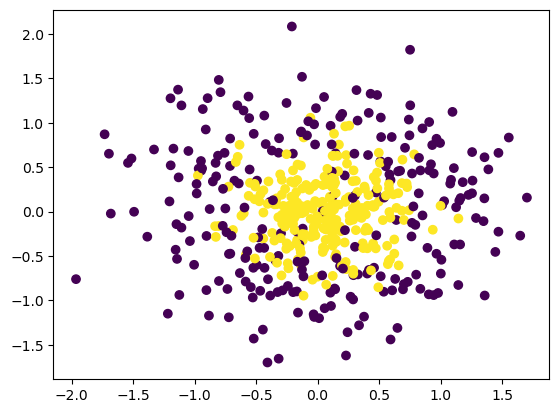

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier

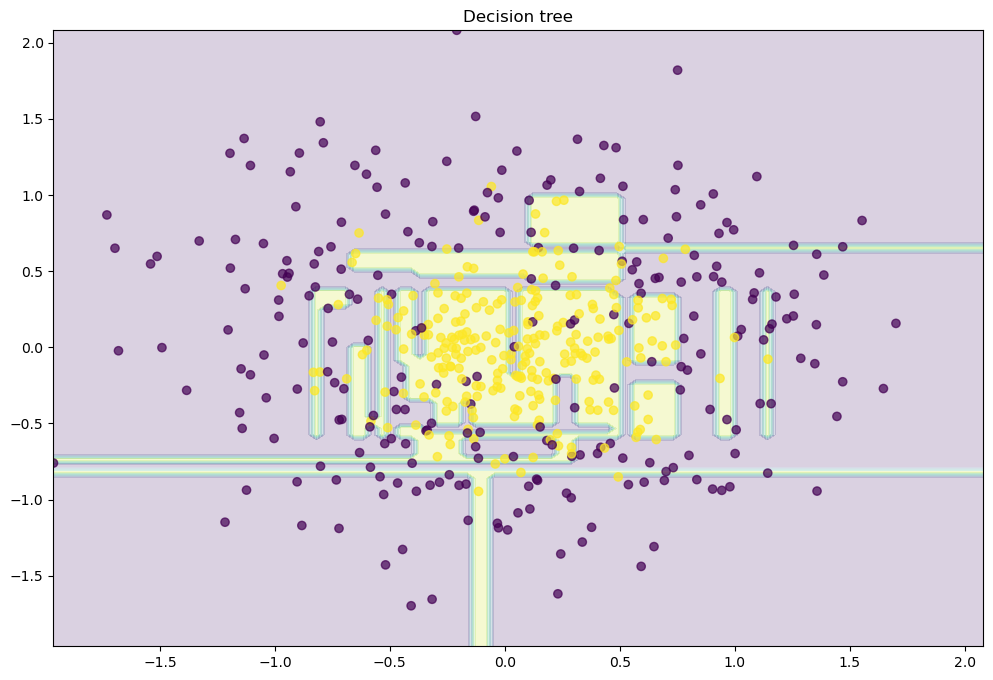

In [11]:
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
plt.figure(figsize=(12,8))
x_range=np.linspace(X.min(),X.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title('Decision tree')
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
rf=RandomForestClassifier()

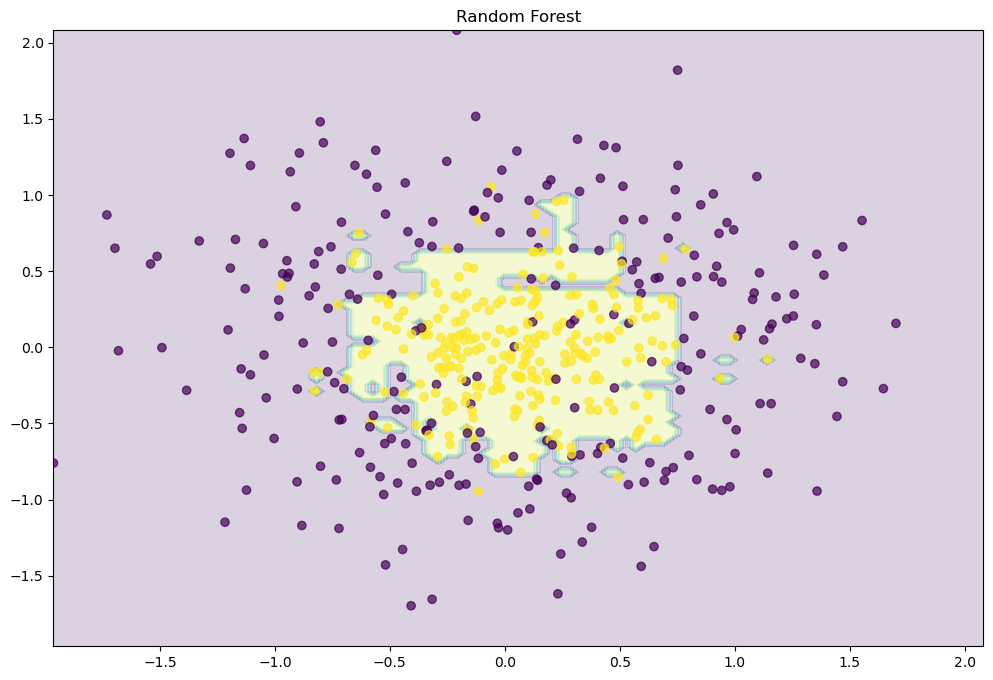

In [15]:
rf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
x_range=np.linspace(X.min(),X.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title('Random Forest')
plt.show()

In [18]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
    

(-5.0, 5.0)

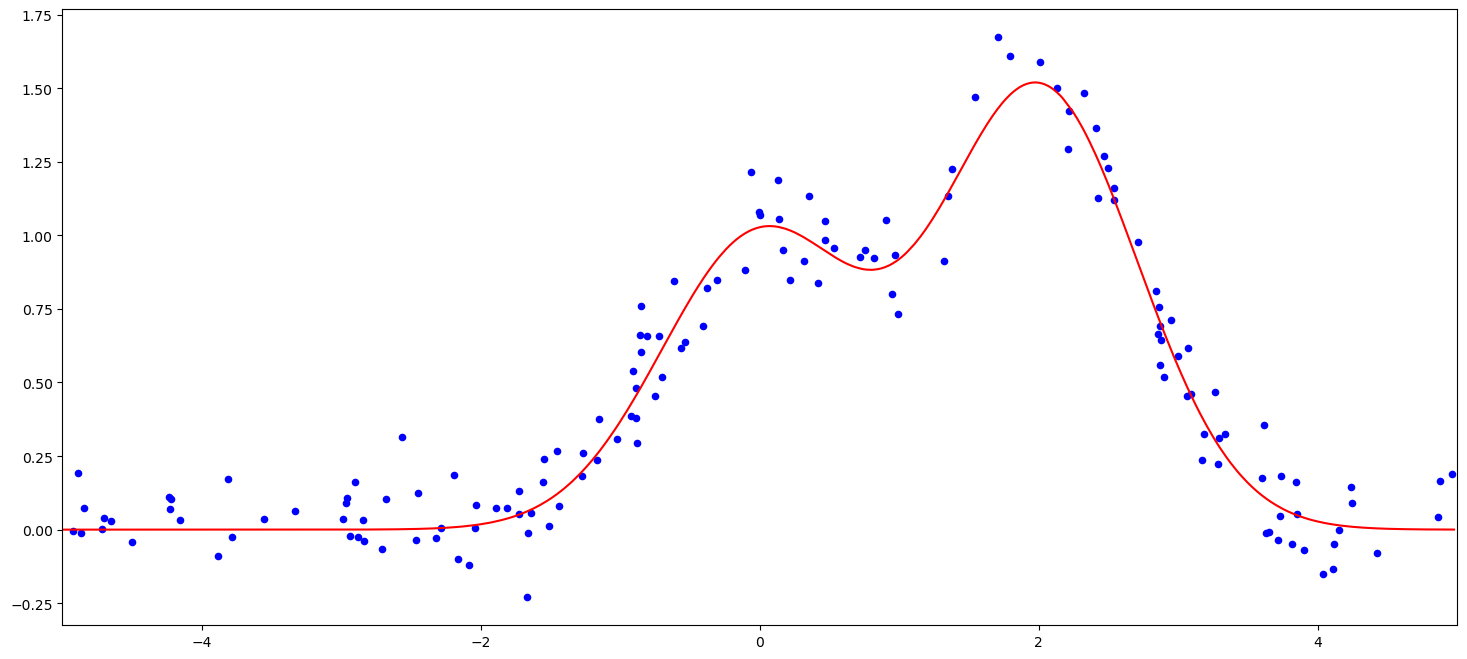

In [19]:
plt.figure(figsize=(18, 8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree: MSE= 20.54')

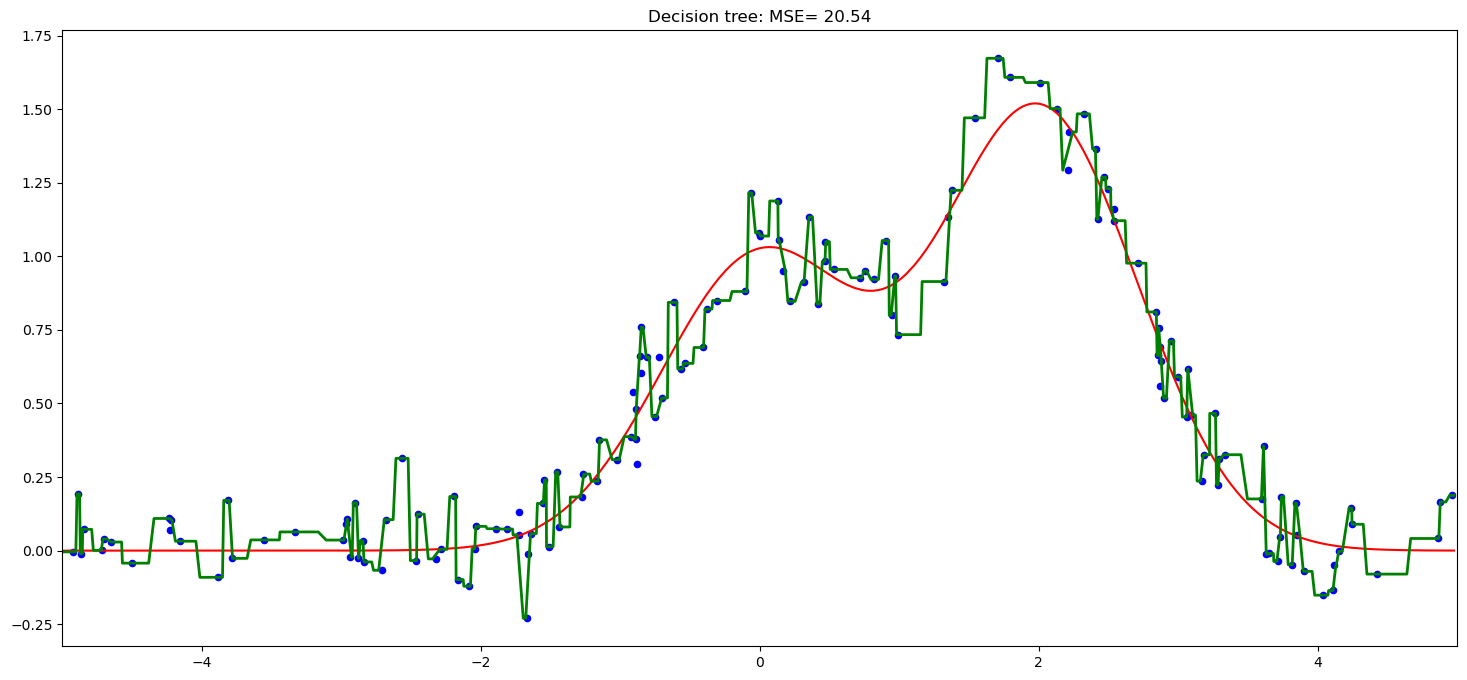

In [20]:
#one decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor().fit(X_train,y_train)
d_predict=dtree.predict(X_test)
plt.figure(figsize=(18, 8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test,d_predict,'g',lw=2)
plt.xlim([-5,5])
plt.title("Decision tree: MSE= %.2f"%np.sum((y_test-d_predict)**2))

Text(0.5, 1.0, 'Decision tree: MSE= 15.28')

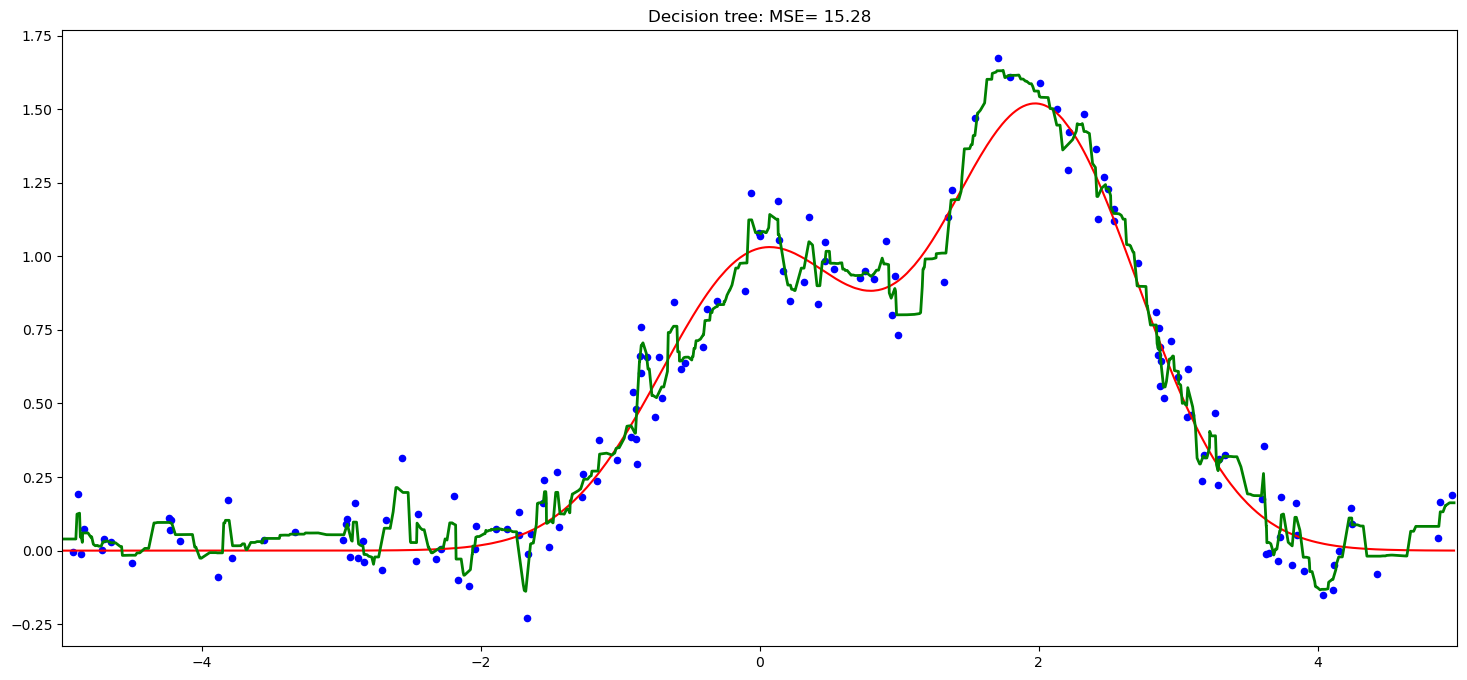

In [21]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)
rf_predict=rfr.predict(X_test)
plt.figure(figsize=(18, 8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test,rf_predict,'g',lw=2)
plt.xlim([-5,5])
plt.title("Decision tree: MSE= %.2f"%np.sum((y_test-rf_predict)**2))